# Analysis of CTA Data with Separate Text and Image Statistics

This notebook analyzes the impact of Call to Action (CTA) on social media engagement, focusing on likes and comments. The analysis distinguishes between CTAs in text and images, and compares the engagement metrics for posts with and without CTA.

```python

In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to load data from JSON files
def load_data(root_directory):
    data = []
    for subdir, _, files in os.walk(root_directory):
        for file in files:
            if file.endswith('-cta-txt.json'):
                txt_file = os.path.join(subdir, file)
                img_file = txt_file.replace('-cta-txt.json', '-cta-img.json')
                original_file = txt_file.replace('-cta-txt.json', '.json')
                
                if os.path.exists(img_file) and os.path.exists(original_file):
                    with open(txt_file, 'r', encoding='utf-8') as f:
                        txt_data = json.load(f)
                    with open(img_file, 'r', encoding='utf-8') as f:
                        img_data = json.load(f)
                    with open(original_file, 'r', encoding='utf-8') as f:
                        original_data = json.load(f)
                    
                    comments = original_data.get('comments', 0)
                    if isinstance(comments, list):
                        comments = len(comments)
                    
                    likes = original_data.get('likes', 0)
                    
                    filename = txt_data.get('original_filename', 'unknown')
                    cta_txt_score = txt_data.get('cta_txt_score', 0)
                    cta_img_score = img_data.get('cta_img_score', 0)
                    
                    data.append({
                        'filename': filename,
                        'cta_txt_score': cta_txt_score,
                        'cta_img_score': cta_img_score,
                        'comments': comments,
                        'likes': likes
                    })
    
    return pd.DataFrame(data)

# Load the data
root_directory = r'C:\git\SocialReporter\data'
df = load_data(root_directory)

### Categorization Based on CTA in Text, Image, or Both

We will categorize the data into four groups:
1. Files with CTA in text (`cta_txt_score > 0.5`)
2. Files with CTA in image (`cta_img_score > 0.5`)
3. Files with CTA in both text and image
4. Files without CTA


In [5]:
# Define the CTA threshold
cta_threshold = 0.5

# Categorize based on the threshold
df['has_cta_txt'] = df['cta_txt_score'] > cta_threshold
df['has_cta_img'] = df['cta_img_score'] > cta_threshold

# Separate into different groups
df_with_cta_txt = df[df['has_cta_txt'] & ~df['has_cta_img']]
df_with_cta_img = df[df['has_cta_img'] & ~df['has_cta_txt']]
df_with_cta_both = df[df['has_cta_txt'] & df['has_cta_img']]
df_without_cta = df[~df['has_cta_txt'] & ~df['has_cta_img']]

# Descriptive statistics for each group
stats_with_cta_txt = df_with_cta_txt.describe()
stats_with_cta_img = df_with_cta_img.describe()
stats_with_cta_both = df_with_cta_both.describe()
stats_without_cta = df_without_cta.describe()

# Display descriptive statistics
print("Descriptive Statistics for Files with CTA in Text Only:")
print(stats_with_cta_txt)

print("\nDescriptive Statistics for Files with CTA in Image Only:")
print(stats_with_cta_img)

print("\nDescriptive Statistics for Files with CTA in Both Text and Image:")
print(stats_with_cta_both)

print("\nDescriptive Statistics for Files WITHOUT CTA:")
print(stats_without_cta)


Descriptive Statistics for Files with CTA in Text Only:
       cta_txt_score  cta_img_score     comments        likes
count    1406.000000    1406.000000  1406.000000  1406.000000
mean        0.879161       0.221693     2.028450   626.127312
std         0.126264       0.105130     3.055229   589.945649
min         0.600000       0.000000     0.000000    26.000000
25%         0.800000       0.200000     0.000000   219.000000
50%         0.900000       0.200000     1.000000   419.000000
75%         1.000000       0.300000     3.000000   850.000000
max         1.000000       0.500000    15.000000  4171.000000

Descriptive Statistics for Files with CTA in Image Only:
       cta_txt_score  cta_img_score    comments        likes
count     456.000000     456.000000  456.000000   456.000000
mean        0.212061       0.701754    1.657895   423.916667
std         0.110778       0.088437    2.906087   481.349835
min         0.000000       0.600000    0.000000    30.000000
25%         0.100000   

### Visualization of Data

We will now visualize the average likes and comments for each group, as well as the distribution of CTA scores.


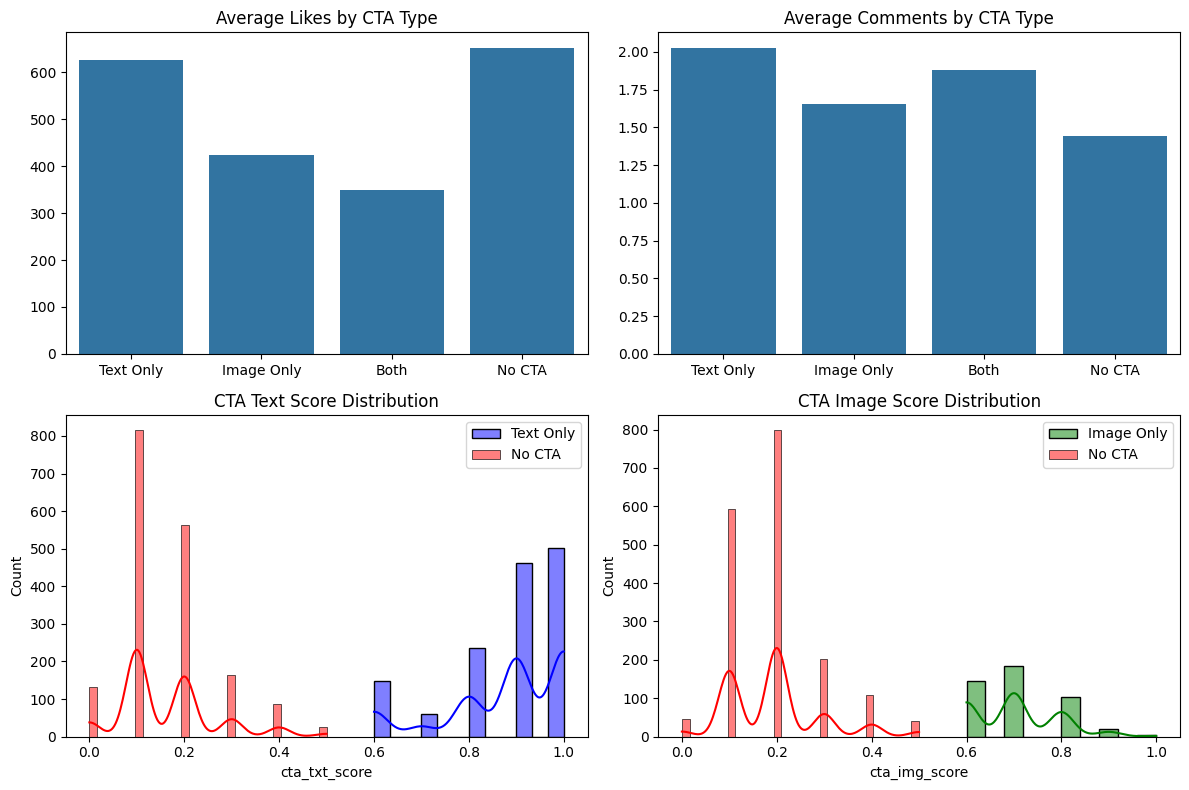

In [6]:
# Visualizations
plt.figure(figsize=(12, 8))

# Bar plot for average likes across different CTA categories
plt.subplot(2, 2, 1)
sns.barplot(x=['Text Only', 'Image Only', 'Both', 'No CTA'], 
            y=[df_with_cta_txt['likes'].mean(), df_with_cta_img['likes'].mean(), 
               df_with_cta_both['likes'].mean(), df_without_cta['likes'].mean()])
plt.title('Average Likes by CTA Type')

# Bar plot for average comments across different CTA categories
plt.subplot(2, 2, 2)
sns.barplot(x=['Text Only', 'Image Only', 'Both', 'No CTA'], 
            y=[df_with_cta_txt['comments'].mean(), df_with_cta_img['comments'].mean(), 
               df_with_cta_both['comments'].mean(), df_without_cta['comments'].mean()])
plt.title('Average Comments by CTA Type')

# Histogram of CTA text scores
plt.subplot(2, 2, 3)
sns.histplot(df_with_cta_txt['cta_txt_score'], color='blue', label='Text Only', kde=True)
sns.histplot(df_without_cta['cta_txt_score'], color='red', label='No CTA', kde=True)
plt.title('CTA Text Score Distribution')
plt.legend()

# Histogram of CTA image scores
plt.subplot(2, 2, 4)
sns.histplot(df_with_cta_img['cta_img_score'], color='green', label='Image Only', kde=True)
sns.histplot(df_without_cta['cta_img_score'], color='red', label='No CTA', kde=True)
plt.title('CTA Image Score Distribution')
plt.legend()

plt.tight_layout()
plt.show()


### Box Plot Visualization for Likes and Comments

We will use box plots to further examine the distribution of likes and comments across different CTA categories.


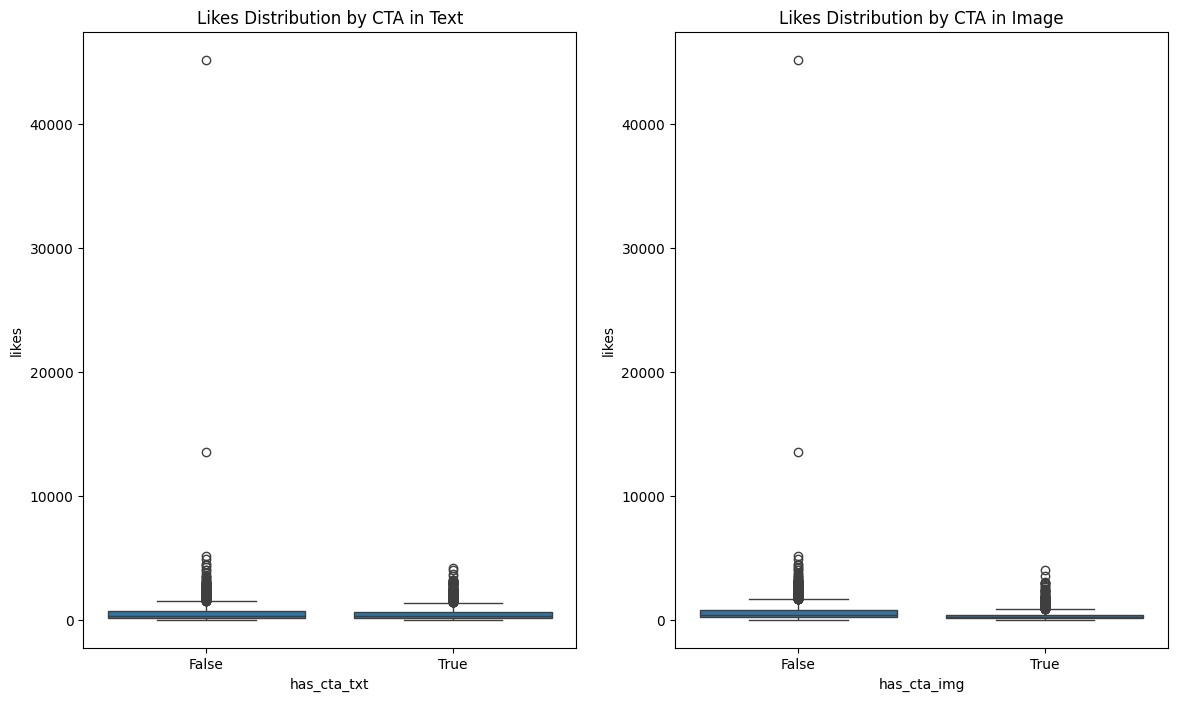

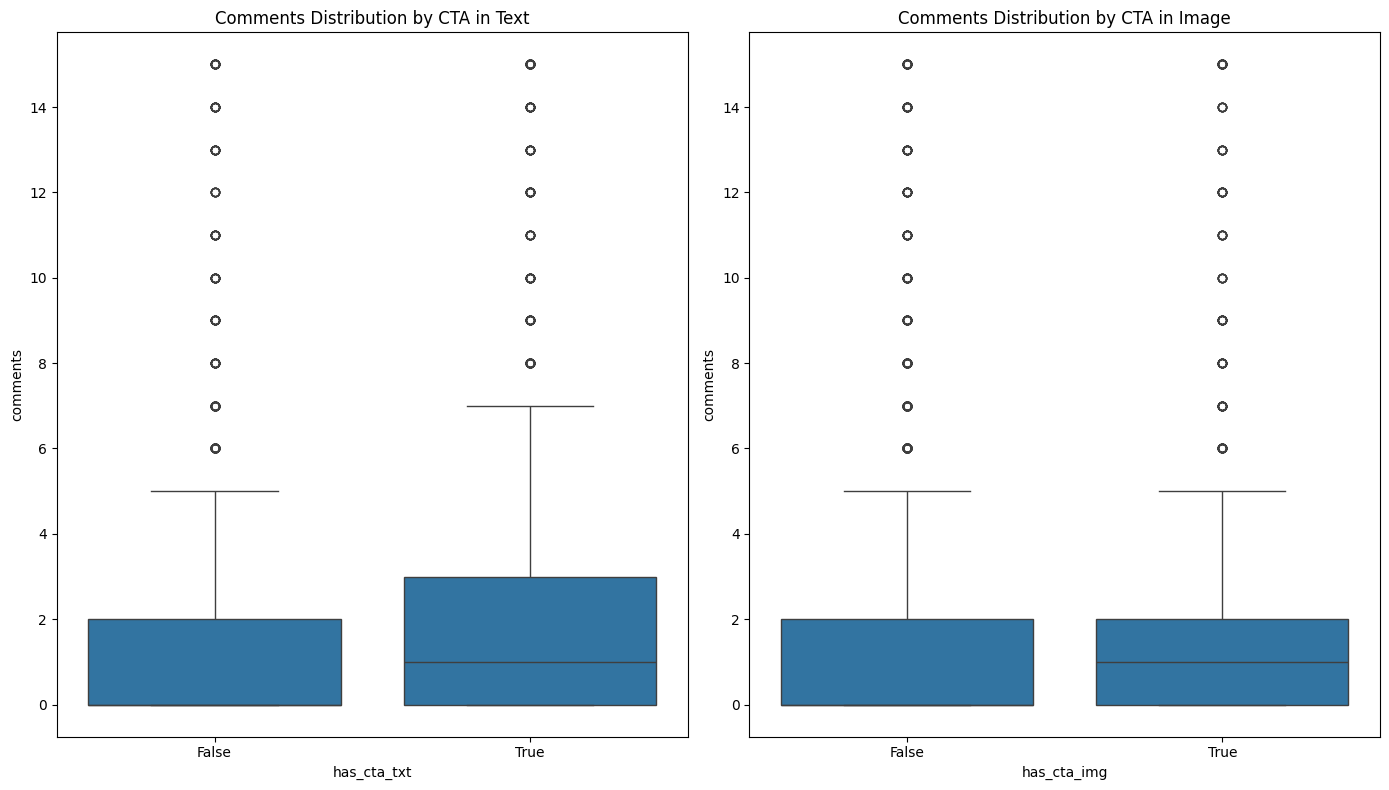

In [7]:
# Box plots for Likes and Comments
plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)
sns.boxplot(x='has_cta_txt', y='likes', data=df)
plt.title('Likes Distribution by CTA in Text')

plt.subplot(1, 2, 2)
sns.boxplot(x='has_cta_img', y='likes', data=df)
plt.title('Likes Distribution by CTA in Image')

plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)
sns.boxplot(x='has_cta_txt', y='comments', data=df)
plt.title('Comments Distribution by CTA in Text')

plt.subplot(1, 2, 2)
sns.boxplot(x='has_cta_img', y='comments', data=df)
plt.title('Comments Distribution by CTA in Image')

plt.tight_layout()
plt.show()


# Correlation Analysis of CTA Impact on Likes and Comments by CTA Type

This notebook performs a correlation analysis that distinguishes between the impact of CTAs in images and text on engagement metrics (likes and comments). We will analyze the correlation separately for each group.

### Categorize Data Based on CTA in Text and Image

We will categorize the data into three groups:
1. **CTA in Text Only**
2. **CTA in Image Only**
3. **CTA in Both Text and Image**

For each group, we will calculate and visualize the correlation matrix.


In [9]:
# Define the CTA threshold
cta_threshold = 0.5

# Categorize based on the threshold
df['has_cta_txt'] = df['cta_txt_score'] > cta_threshold
df['has_cta_img'] = df['cta_img_score'] > cta_threshold

# Create subsets for each category
df_cta_text_only = df[df['has_cta_txt'] & ~df['has_cta_img']]
df_cta_image_only = df[df['has_cta_img'] & ~df['has_cta_txt']]
df_cta_both = df[df['has_cta_txt'] & df['has_cta_img']]
df_no_cta = df[~df['has_cta_txt'] & ~df['has_cta_img']]

# Calculate correlation matrices for each group
correlation_text_only = df_cta_text_only[['cta_txt_score', 'likes', 'comments']].corr()
correlation_image_only = df_cta_image_only[['cta_img_score', 'likes', 'comments']].corr()
correlation_both = df_cta_both[['cta_txt_score', 'cta_img_score', 'likes', 'comments']].corr()
correlation_no_cta = df_no_cta[['cta_txt_score', 'cta_img_score', 'likes', 'comments']].corr()

# Display correlation matrices
print("Correlation Matrix for CTA in Text Only:")
print(correlation_text_only)

print("\nCorrelation Matrix for CTA in Image Only:")
print(correlation_image_only)

print("\nCorrelation Matrix for CTA in Both Text and Image:")
print(correlation_both)

print("\nCorrelation Matrix for No CTA:")
print(correlation_no_cta)


Correlation Matrix for CTA in Text Only:
               cta_txt_score     likes  comments
cta_txt_score       1.000000  0.009232  0.002829
likes               0.009232  1.000000  0.486930
comments            0.002829  0.486930  1.000000

Correlation Matrix for CTA in Image Only:
               cta_img_score     likes  comments
cta_img_score       1.000000 -0.113993  -0.05410
likes              -0.113993  1.000000   0.48637
comments           -0.054100  0.486370   1.00000

Correlation Matrix for CTA in Both Text and Image:
               cta_txt_score  cta_img_score     likes  comments
cta_txt_score       1.000000       0.159929 -0.037589  0.043649
cta_img_score       0.159929       1.000000 -0.252218 -0.042514
likes              -0.037589      -0.252218  1.000000  0.513724
comments            0.043649      -0.042514  0.513724  1.000000

Correlation Matrix for No CTA:
               cta_txt_score  cta_img_score     likes  comments
cta_txt_score       1.000000       0.125836 -0.049966  0

### Visualization of Correlation Matrices

We will use heatmaps to visually represent the correlation matrices for each group, which helps in understanding the strength and direction of relationships between the variables.


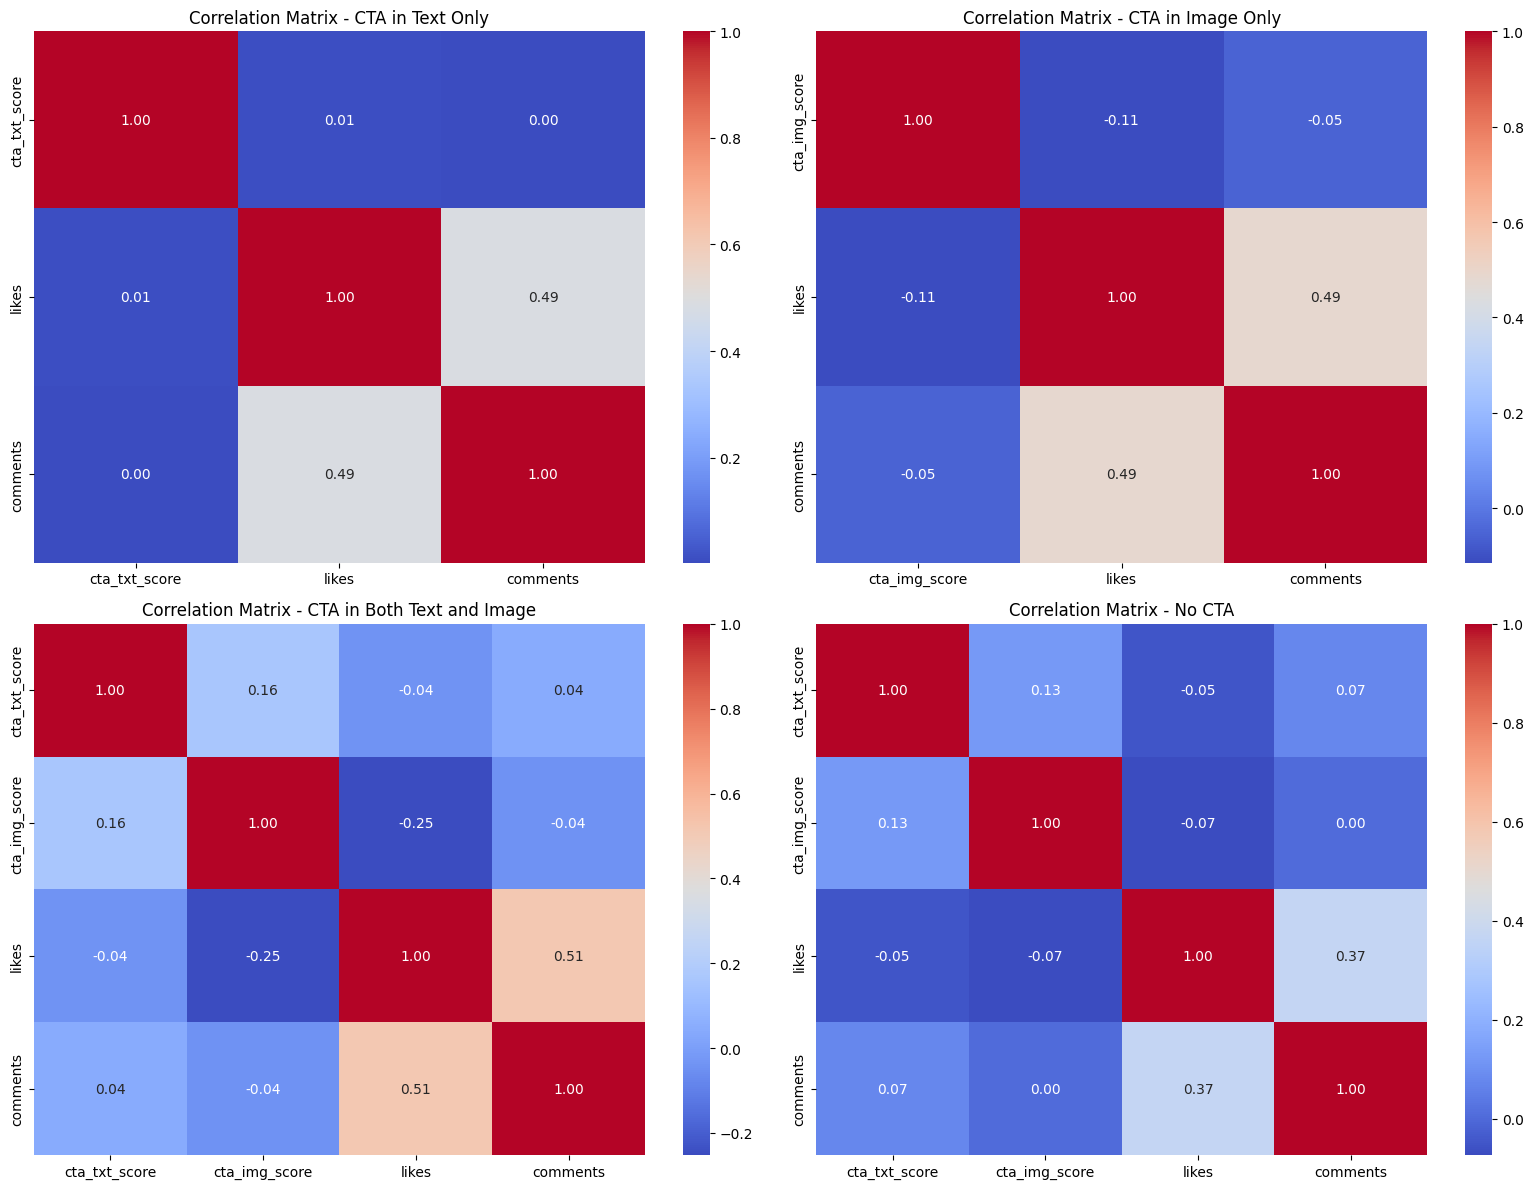

In [10]:
# Plot the correlation matrices as heatmaps
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
sns.heatmap(correlation_text_only, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix - CTA in Text Only')

plt.subplot(2, 2, 2)
sns.heatmap(correlation_image_only, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix - CTA in Image Only')

plt.subplot(2, 2, 3)
sns.heatmap(correlation_both, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix - CTA in Both Text and Image')

plt.subplot(2, 2, 4)
sns.heatmap(correlation_no_cta, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix - No CTA')

plt.tight_layout()
plt.show()


### Interpretation of Results

The correlation coefficients in these matrices will help us understand the relationship between CTA scores (text and image) and engagement metrics (likes and comments) across different CTA types:
- **CTA in Text Only**: How CTA in text influences engagement.
- **CTA in Image Only**: How CTA in images influences engagement.
- **CTA in Both**: The combined effect of CTA in both text and images.
- **No CTA**: The baseline correlation for posts without any CTA.

A positive correlation suggests that as the CTA score increases, so do the likes or comments. A negative correlation suggests the opposite. By comparing these matrices, we can determine which type of CTA is more effective in driving engagement.


# Engagement Rate Analysis by CTA Type (Text vs Image)

This notebook calculates and analyzes the engagement rate for posts with CTA in text, image, both, or no CTA, and compares these metrics to understand the impact of different CTA types on engagement.



### Calculate Engagement Rate

We will calculate the engagement rate for each post, and then analyze how the engagement rate varies across different types of CTAs (text, image, both, and none).


In [12]:
# Calculate the total interactions and engagement rate
df['total_interactions'] = df['likes'] + df['comments']
df['engagement_rate'] = (df['total_interactions'] / df['total_interactions'].sum()) * 100

# Categorize the data based on CTA presence
df['has_cta_txt'] = df['cta_txt_score'] > 0.5
df['has_cta_img'] = df['cta_img_score'] > 0.5

# Create subsets for each category
df_cta_text_only = df[df['has_cta_txt'] & ~df['has_cta_img']]
df_cta_image_only = df[df['has_cta_img'] & ~df['has_cta_txt']]
df_cta_both = df[df['has_cta_txt'] & df['has_cta_img']]
df_no_cta = df[~df['has_cta_txt'] & ~df['has_cta_img']]

# Calculate average engagement rate for each group
avg_engagement_text_only = df_cta_text_only['engagement_rate'].mean()
avg_engagement_image_only = df_cta_image_only['engagement_rate'].mean()
avg_engagement_both = df_cta_both['engagement_rate'].mean()
avg_engagement_no_cta = df_no_cta['engagement_rate'].mean()

# Display the average engagement rates
print("Average Engagement Rate for CTA in Text Only: {:.4f}%".format(avg_engagement_text_only))
print("Average Engagement Rate for CTA in Image Only: {:.4f}%".format(avg_engagement_image_only))
print("Average Engagement Rate for CTA in Both Text and Image: {:.4f}%".format(avg_engagement_both))
print("Average Engagement Rate for No CTA: {:.4f}%".format(avg_engagement_no_cta))


Average Engagement Rate for CTA in Text Only: 0.0239%
Average Engagement Rate for CTA in Image Only: 0.0162%
Average Engagement Rate for CTA in Both Text and Image: 0.0134%
Average Engagement Rate for No CTA: 0.0249%


### Visualization of Engagement Rates

We'll visualize the engagement rates across different CTA types using bar plots to better understand the impact of CTAs on engagement.


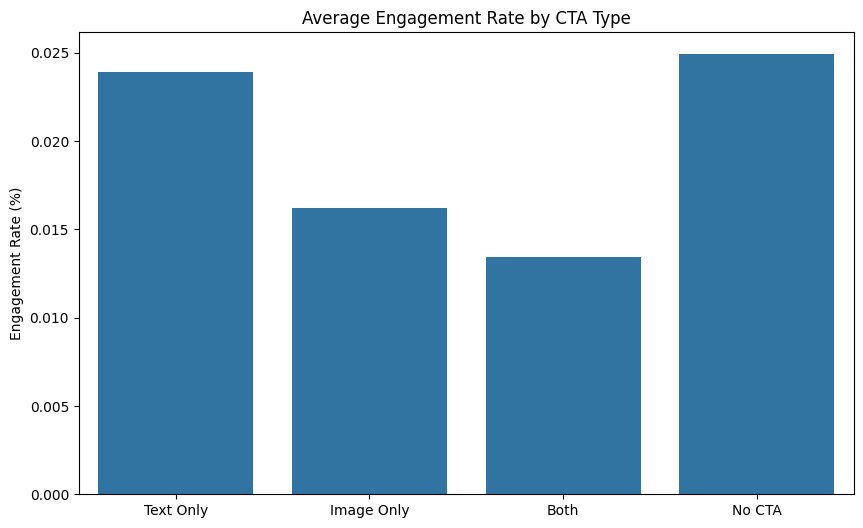

In [13]:
# Visualize the engagement rates
plt.figure(figsize=(10, 6))
sns.barplot(x=['Text Only', 'Image Only', 'Both', 'No CTA'], 
            y=[avg_engagement_text_only, avg_engagement_image_only, 
               avg_engagement_both, avg_engagement_no_cta])
plt.title('Average Engagement Rate by CTA Type')
plt.ylabel('Engagement Rate (%)')
plt.show()


# Threshold Analysis of CTA Score Impact on Engagement

This notebook investigates whether there is a threshold in the CTA score above which a significant increase in comments or likes can be observed.

### Define Thresholds for CTA Scores

We will divide the CTA scores into segments and calculate the average engagement metrics (likes and comments) for each segment.


In [2]:
# Define thresholds
cta_thresholds = [0, 0.2, 0.4, 0.6, 0.8, 1.0]

# Create bins for text and image CTA scores
df['cta_txt_bin'] = pd.cut(df['cta_txt_score'], bins=cta_thresholds)
df['cta_img_bin'] = pd.cut(df['cta_img_score'], bins=cta_thresholds)

# Group by the bins and calculate the mean likes and comments for each group
txt_bin_means = df.groupby('cta_txt_bin')[['likes', 'comments']].mean()
img_bin_means = df.groupby('cta_img_bin')[['likes', 'comments']].mean()

# Display the results
print("Average Likes and Comments by Text CTA Score Bins:")
print(txt_bin_means)

print("\nAverage Likes and Comments by Image CTA Score Bins:")
print(img_bin_means)


Average Likes and Comments by Text CTA Score Bins:
                  likes  comments
cta_txt_bin                      
(0.0, 0.2]   648.367043  1.442594
(0.2, 0.4]   462.333333  1.811475
(0.4, 0.6]   576.728302  1.920755
(0.6, 0.8]   444.039014  1.921971
(0.8, 1.0]   508.695431  1.974070

Average Likes and Comments by Image CTA Score Bins:
                  likes  comments
cta_img_bin                      
(0.0, 0.2]   681.391579  1.709474
(0.2, 0.4]   501.408602  1.669739
(0.4, 0.6]   503.942350  1.944568
(0.6, 0.8]   349.083166  1.726453
(0.8, 1.0]   224.148352  1.846995


C:\Users\HerbyHerb\AppData\Local\Temp\ipykernel_7616\1168565138.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  txt_bin_means = df.groupby('cta_txt_bin')[['likes', 'comments']].mean()
C:\Users\HerbyHerb\AppData\Local\Temp\ipykernel_7616\1168565138.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  img_bin_means = df.groupby('cta_img_bin')[['likes', 'comments']].mean()


### Visualization of Threshold Effects

We will plot the average likes and comments against the CTA score bins to visualize any significant increases.


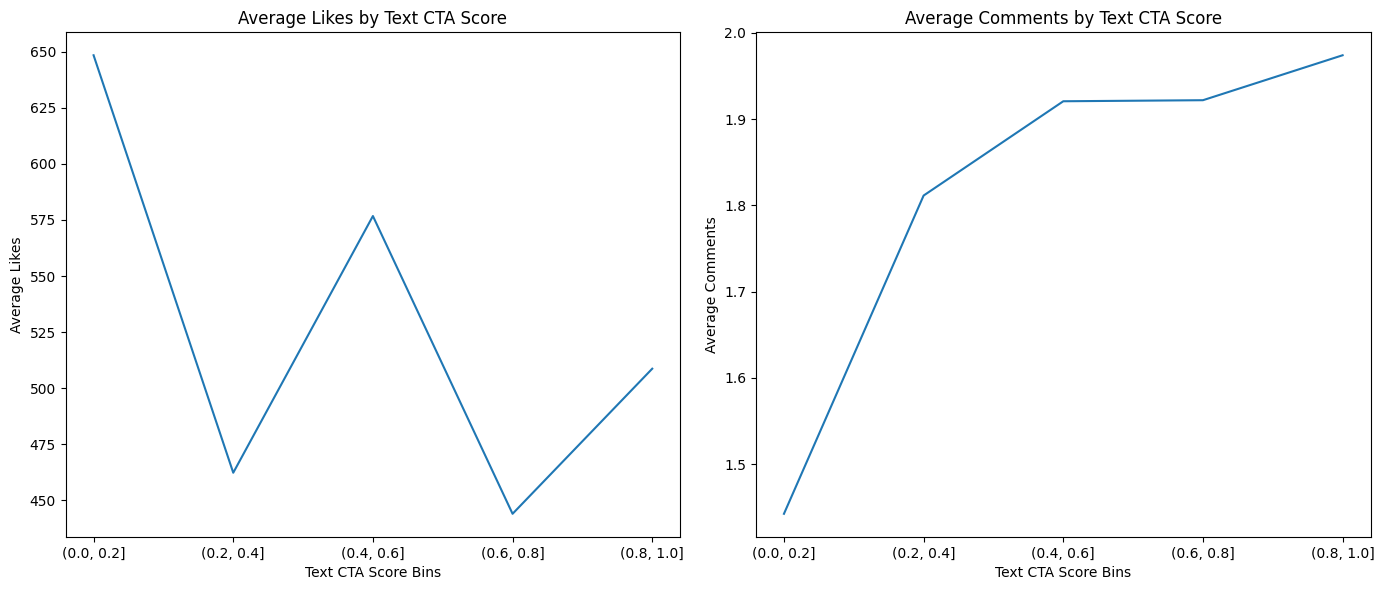

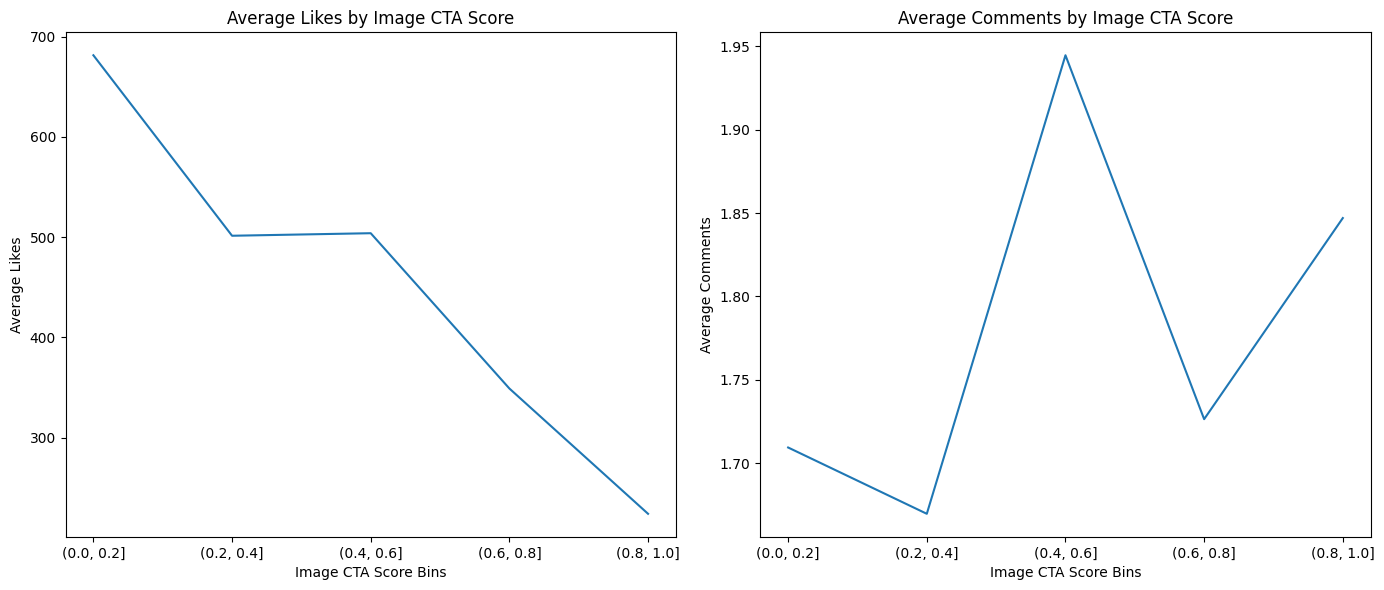

In [3]:
# Plot the threshold analysis for text CTA scores
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.lineplot(x=txt_bin_means.index.astype(str), y=txt_bin_means['likes'])
plt.title('Average Likes by Text CTA Score')
plt.xlabel('Text CTA Score Bins')
plt.ylabel('Average Likes')

plt.subplot(1, 2, 2)
sns.lineplot(x=txt_bin_means.index.astype(str), y=txt_bin_means['comments'])
plt.title('Average Comments by Text CTA Score')
plt.xlabel('Text CTA Score Bins')
plt.ylabel('Average Comments')

plt.tight_layout()
plt.show()

# Plot the threshold analysis for image CTA scores
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.lineplot(x=img_bin_means.index.astype(str), y=img_bin_means['likes'])
plt.title('Average Likes by Image CTA Score')
plt.xlabel('Image CTA Score Bins')
plt.ylabel('Average Likes')

plt.subplot(1, 2, 2)
sns.lineplot(x=img_bin_means.index.astype(str), y=img_bin_means['comments'])
plt.title('Average Comments by Image CTA Score')
plt.xlabel('Image CTA Score Bins')
plt.ylabel('Average Comments')

plt.tight_layout()
plt.show()


## Recommendations for AI-Driven Social Media Content Creation

Based on our analysis of CTA effectiveness in social media posts, we propose the following strategies for training an AI model to generate compelling content:

### 1. Prioritize Strong, Compelling Text CTAs
- **LLM-Generated Texts:** Use a Large Language Model (LLM) like GPT to craft compelling and clear text CTAs. These CTAs should be actionable and directly relevant to the content of the post. Strong text CTAs have demonstrated effectiveness in driving comments and can recover in terms of likes when well-phrased.
- **Text CTA Optimization:** Train the LLM to understand social media language nuances, using data from successful posts to optimize the tone, length, and clarity of the CTAs.

### 2. Use Image CTAs Sparingly and Test Their Effectiveness
- **AI-Generated Images:** While generating images with AI, avoid embedding overly directive CTAs within the visuals. Given that stronger image CTAs tend to reduce likes, the model should focus on creating visually engaging images that complement the content without overshadowing it.
- **Testing and Iteration:** Implement A/B testing to find the right balance between compelling visuals and subtle image-based CTAs. Train the model to adjust the prominence of CTAs in images based on the context and the target audience.

### 3. Avoid Overloading Posts with Combined CTAs
- **Simplified Messaging:** When creating posts, avoid combining strong text and image CTAs. The model should prioritize one form of CTA based on the content and platform-specific trends. If both CTAs are necessary, ensure that they do not compete for the audience’s attention, which could dilute the message.
- **Targeted Content:** Train the AI to recognize when and how to combine CTAs effectively by analyzing patterns in successful posts. This could involve using softer CTAs in one modality (e.g., subtle image prompts) while making the other modality (e.g., text) the primary driver.

### 4. Leverage High-Quality Content Without Explicit CTAs
- **Content-First Approach:** Recognize that sometimes, the content itself is the best CTA. Train the AI to generate high-quality, engaging content that doesn’t necessarily rely on explicit CTAs. This content can include storytelling, educational posts, or visually striking images that naturally invite interaction.
- **Adaptive CTA Strategies:** The model should be able to adapt and decide when to omit CTAs entirely, based on content type and audience behavior. This could involve analyzing historical data to identify scenarios where no CTA leads to higher engagement.

### 5. Continuous Learning and Adaptation
- **Feedback Loops:** Implement a feedback loop where the AI continuously learns from the performance of past posts. This will enable the model to refine its approach over time, adapting to changing audience preferences and platform algorithms.
- **Data-Driven Decisions:** Ensure that the model is equipped with up-to-date data on trends, platform changes, and audience behavior. This will allow the AI to make data-driven decisions when generating content, ensuring relevance and maximizing engagement.

### Conclusion
By focusing on these strategies, the AI model can be trained to create social media posts that are both engaging and effective. Prioritizing strong text-based CTAs, using image CTAs judiciously, and sometimes letting the content speak for itself will help optimize the performance of social media campaigns. Continuous learning and adaptation will be key to maintaining relevance in a dynamic social media landscape.
